In [3]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.8 MB/s eta 0:00:00


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
#WARNING HANDLES
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

#MODELS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#METRICS
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS



In [7]:
df_train=pd.read_csv(r"C:\Users\annu\Downloads\9961_14084_bundle_archive\Train TCLB.csv")
df_test=pd.read_csv(r"C:\Users\annu\Downloads\9961_14084_bundle_archive\Train TCLB.csv")

In [ ]:
#PREPROCESSING THE DATASET

In [9]:
df_train.sample(5)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4984,FDC26,10.195,Low Fat,0.126383,Canned,112.1886,OUT046,1997,Small,Tier 1,Supermarket Type1,667.1316
2139,FDF40,NaN,Regular,0.039416,Dairy,247.8092,OUT019,1985,Small,Tier 1,Grocery Store,498.0184
4867,FDJ41,6.850,Low Fat,0.022879,Frozen Foods,262.3594,OUT035,2004,Small,Tier 2,Supermarket Type1,3924.8910
5857,FDB04,NaN,Regular,0.062920,Dairy,88.9856,OUT027,1985,Medium,Tier 3,Supermarket Type3,3515.4240
7572,FDI14,14.100,Low Fat,0.090185,Canned,140.2496,OUT017,2007,NaN,Tier 2,Supermarket Type1,2681.8424


In [10]:
df_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2534,NCY30,20.25,LF,0.025953,Household,179.5976,OUT046,1997,Small,Tier 1,Supermarket Type1,2535.3664
8493,FDP21,7.42,Regular,0.025886,Snack Foods,189.1872,OUT017,2007,NaN,Tier 2,Supermarket Type1,4727.1800
5927,NCK53,11.60,Low Fat,0.037581,Health and Hygiene,98.9042,OUT046,1997,Small,Tier 1,Supermarket Type1,1488.0630
5305,NCG55,16.25,Low Fat,0.039207,Household,116.1176,OUT049,1999,Medium,Tier 1,Supermarket Type1,2633.9048
4481,DRI01,7.97,Low Fat,0.000000,Soft Drinks,172.0422,OUT018,2009,Medium,Tier 3,Supermarket Type2,5690.5926


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
#PERCENTAGE OF MISSING VALUES
print(df_train.isnull().sum()/len(df_train)*100,"\n\n\n")


print(df_test.isnull().sum()/len(df_train)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 



Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [26]:
print("Outlet_Size:\n",df_train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n",df_test.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [27]:
#FILLING MISSING VALUE WITH MODE IN OUTLEt TYPE(CATEGORICAL COLUMN)
#Train
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].dropna().mode().values[0])

#test
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].dropna().mode().values[0])

In [28]:
print(df_train.isnull().sum(),"\n\n\n")
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 





Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#FILLING MISSING VALUE WITH MEAN IN Item_Weight (NUMRICAL COLUMN)

In [30]:
#Train
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].dropna().mean())

#Test
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].dropna().mean())

In [31]:
print(df_train.isnull().sum(),"\n\n\n")
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64 





Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
#DATA EXPLORATION
#categorical columns
categorical = df_train.select_dtypes('object').columns.to_list()
numerical = df_train.select_dtypes('number').columns.to_list()


#NOW CRAETING DATAFREAMES
#numerical DF
numb =  df_train[numerical]
#categoric DF
cate = df_train[categorical]

#print(numb)
#print(cate)

[df_train[category].value_counts() for category in cate[1:]]

[FDW13    10
 FDG33    10
 NCY18     9
 FDD38     9
 DRE49     9
          ..
 FDY43     1
 FDQ60     1
 FDO33     1
 DRF48     1
 FDC23     1
 Name: Item_Identifier, Length: 1559, dtype: int64,
 Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Na

In [35]:
#FOR Train
df_train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#FOR Test
df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)


In [36]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<Axes: >

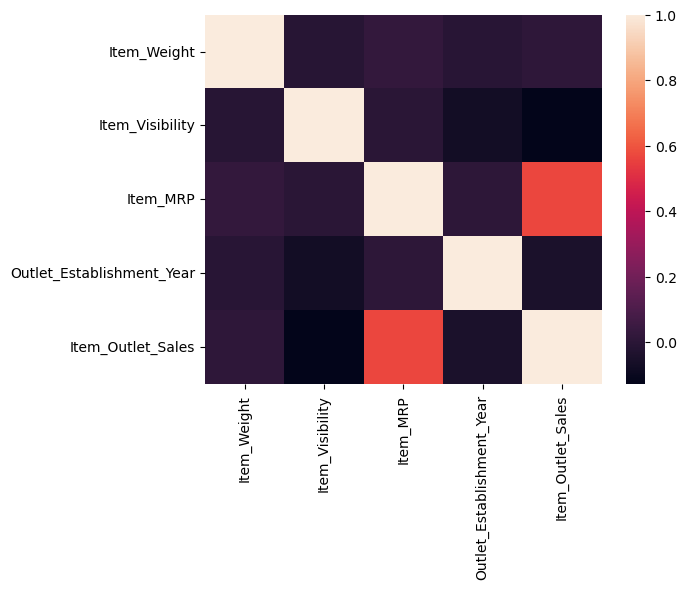

In [89]:
#plotting the correlation matrix
sns.heatmap(df_train.corr())

# VARIABLE ANALYSIS

In [ ]:
#1>UNIVARIATE- #CATEGORICAL:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

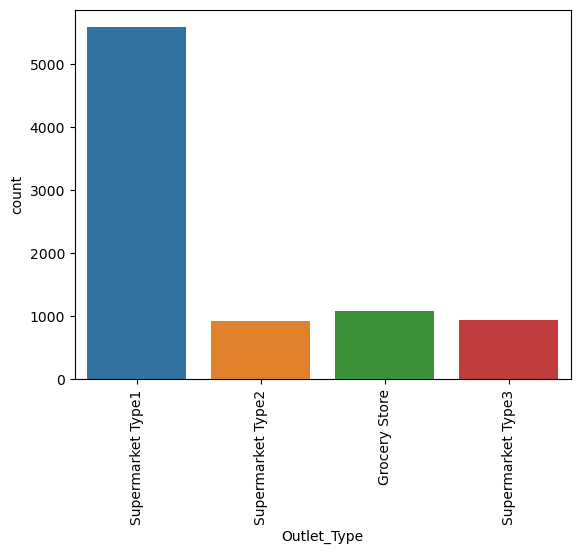

In [40]:
sns.countplot(x='Outlet_Type' , data=df_train)
plt.xlabel('Outlet_Type')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

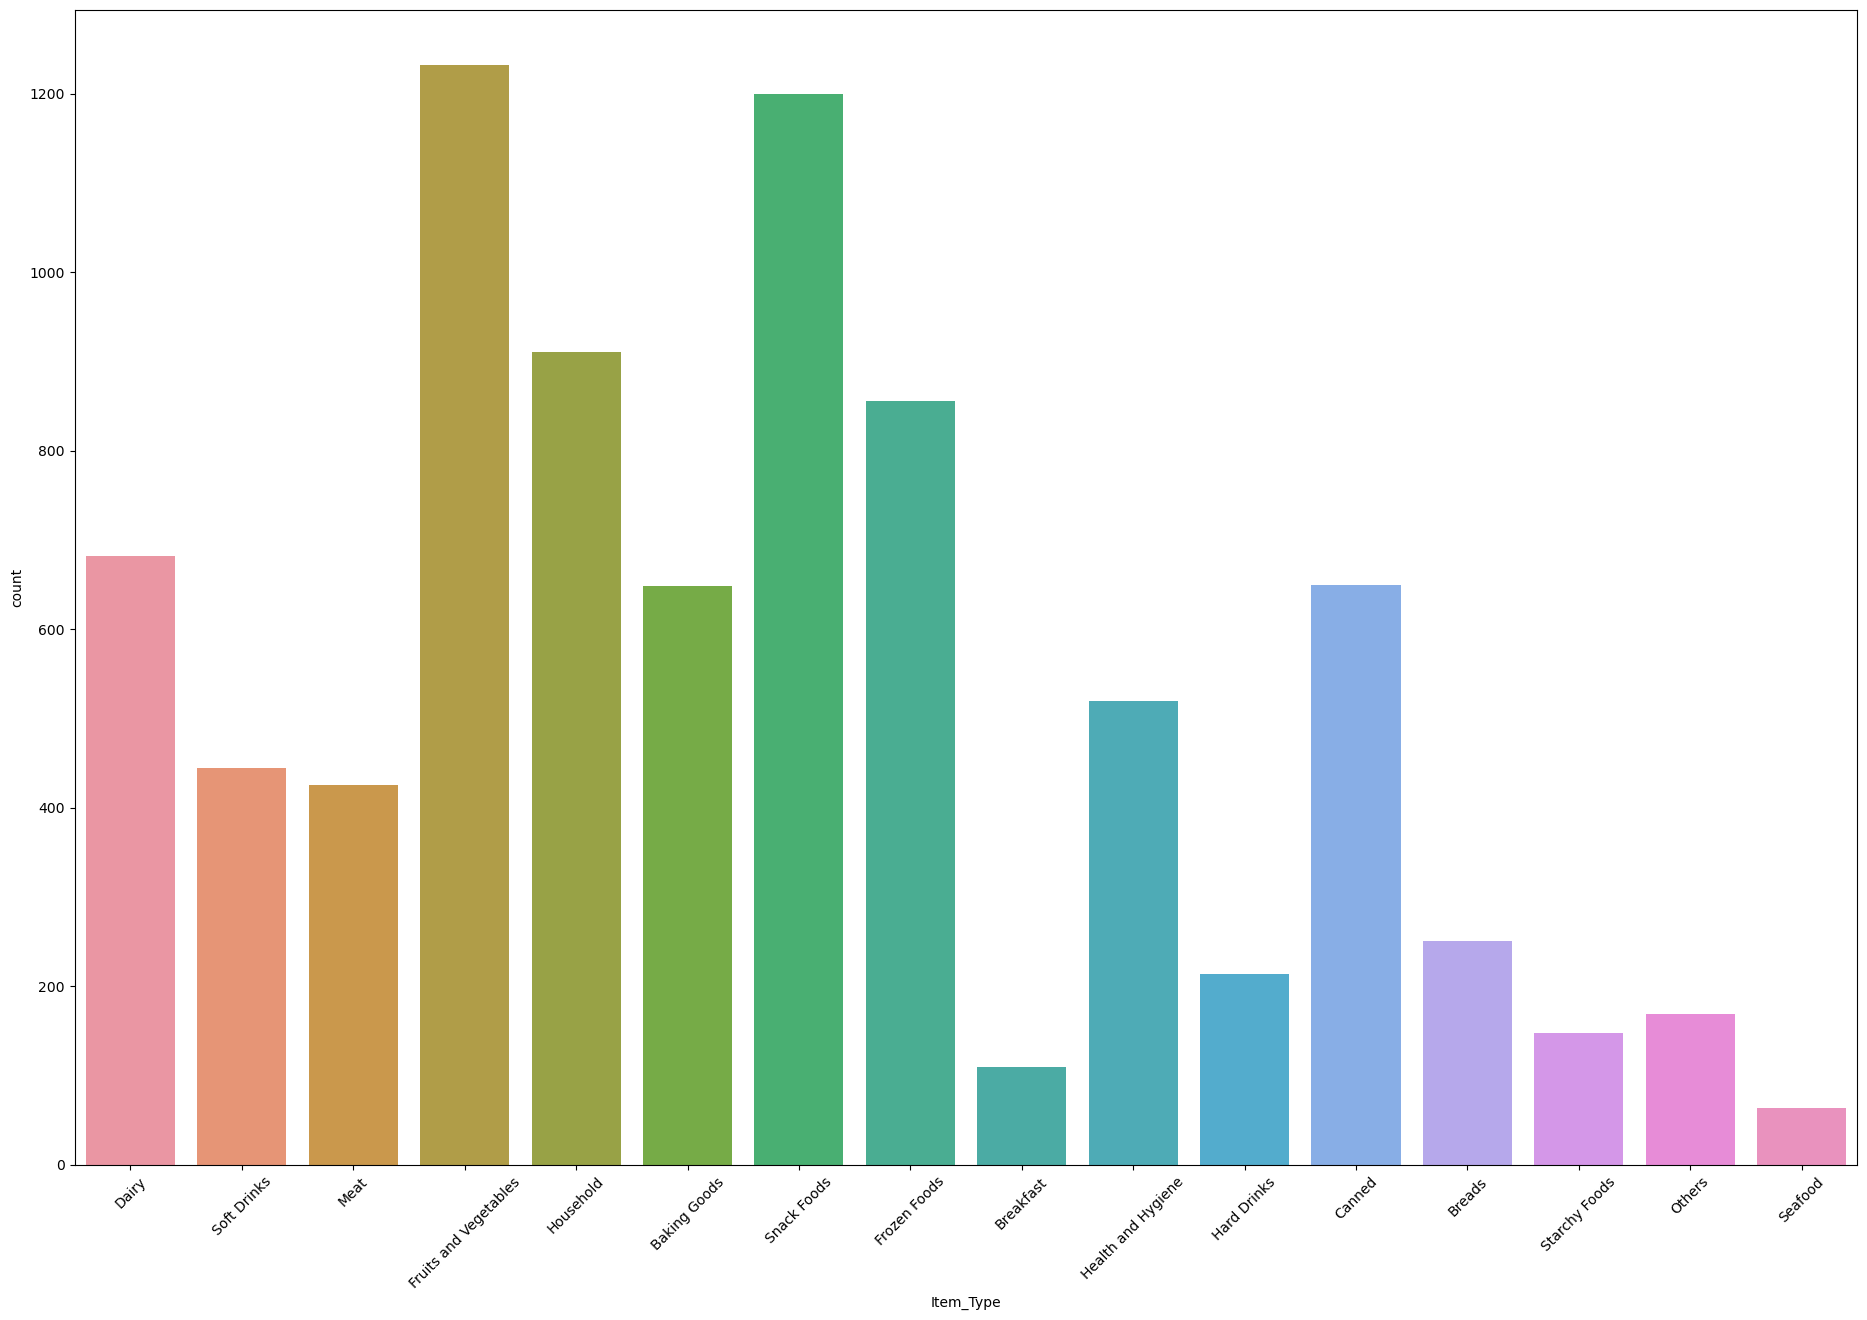

In [51]:
plt.figure(figsize=(23,15))
sns.countplot(x='Item_Type' ,data=df_train)
plt.xlabel('Item_Type')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Item Fat Content Distribution')

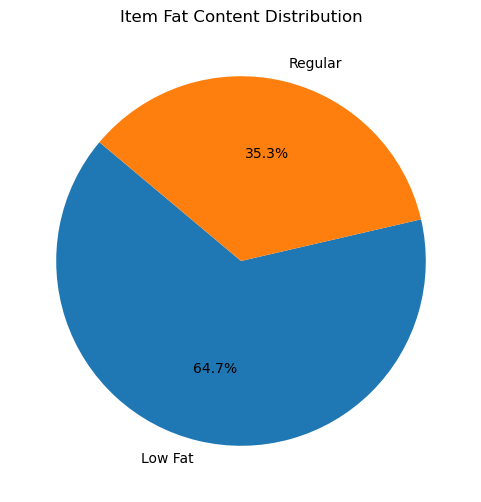

In [64]:
fat_content_counts = df_train['Item_Fat_Content'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fat_content_counts, labels=fat_content_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Item Fat Content Distribution')


Text(0.5, 0, 'Outlet_Location_Type Distribution')

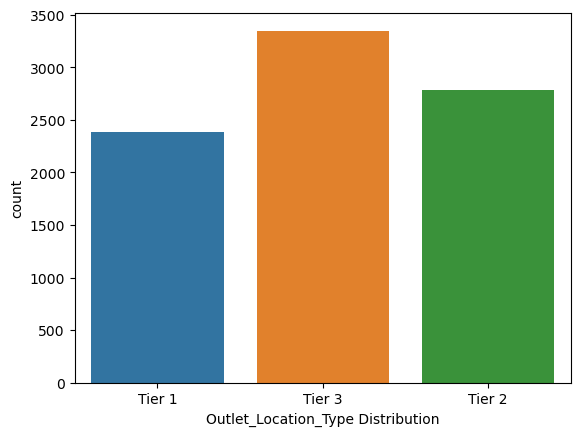

In [63]:
sns.countplot(x='Outlet_Location_Type' , data=df_train)
plt.xlabel('Outlet_Location_Type Distribution')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

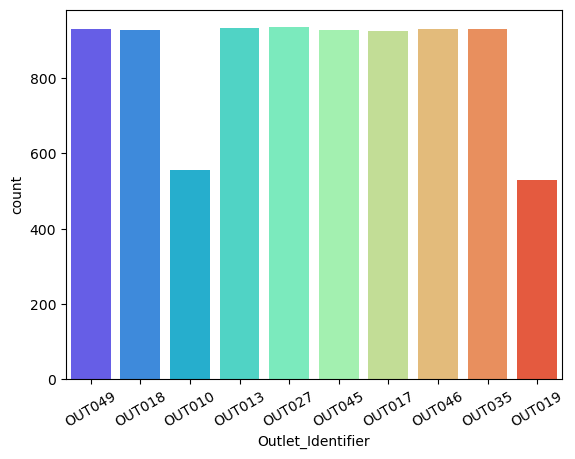

In [65]:
sns.countplot(x='Outlet_Identifier' , data=df_train ,palette='rainbow')
plt.xlabel('Outlet_Identifier')
plt.xticks(rotation=30)

In [ ]:
 # BIVARIATE ANALYSISb

In [66]:
#Numerical coln 
#list of all the numeric columns
numerical = df_train.select_dtypes('number').columns.to_list()

#numerical DF
numb =  df_train[numerical]


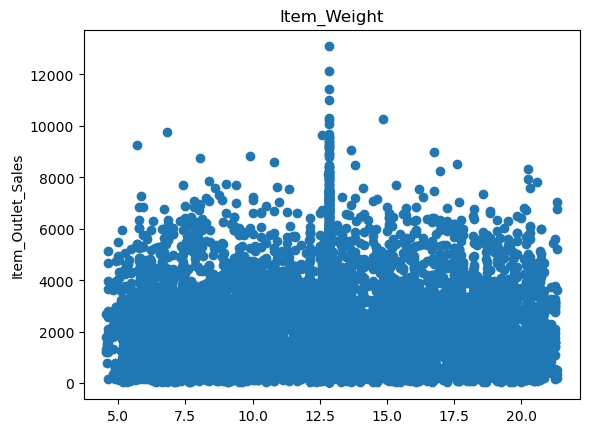

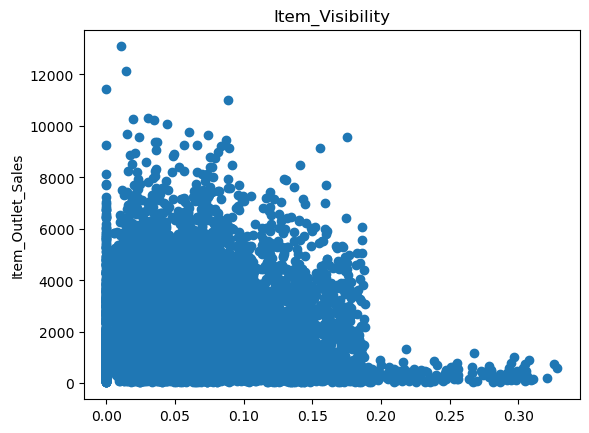

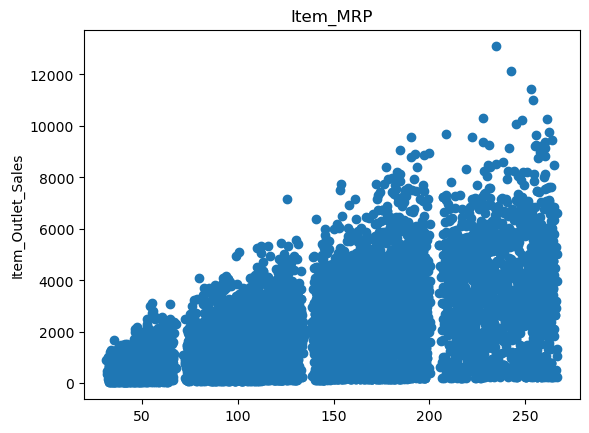

In [70]:
for numeric in numb[numerical[:3]]:
    plt.scatter(numb[numeric], numb['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

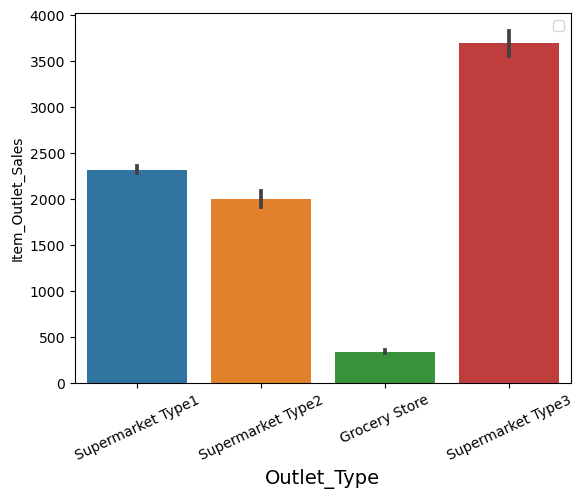

In [74]:

sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=df_train)
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.xticks(rotation=25)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

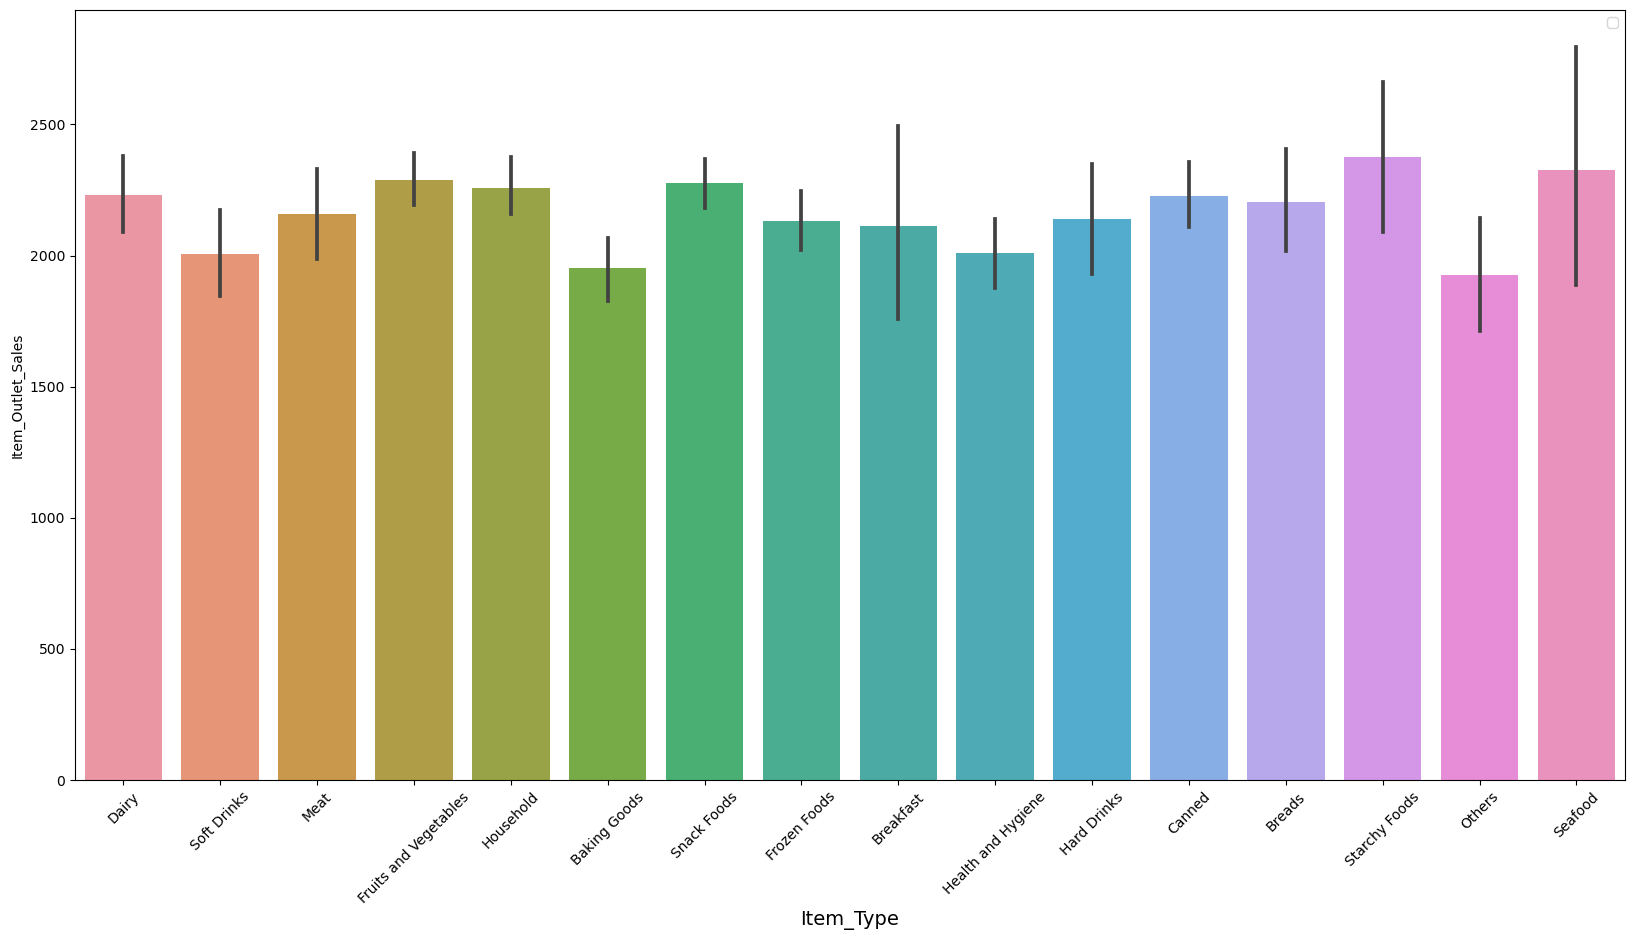

In [79]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=df_train)
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.xticks(rotation=45)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


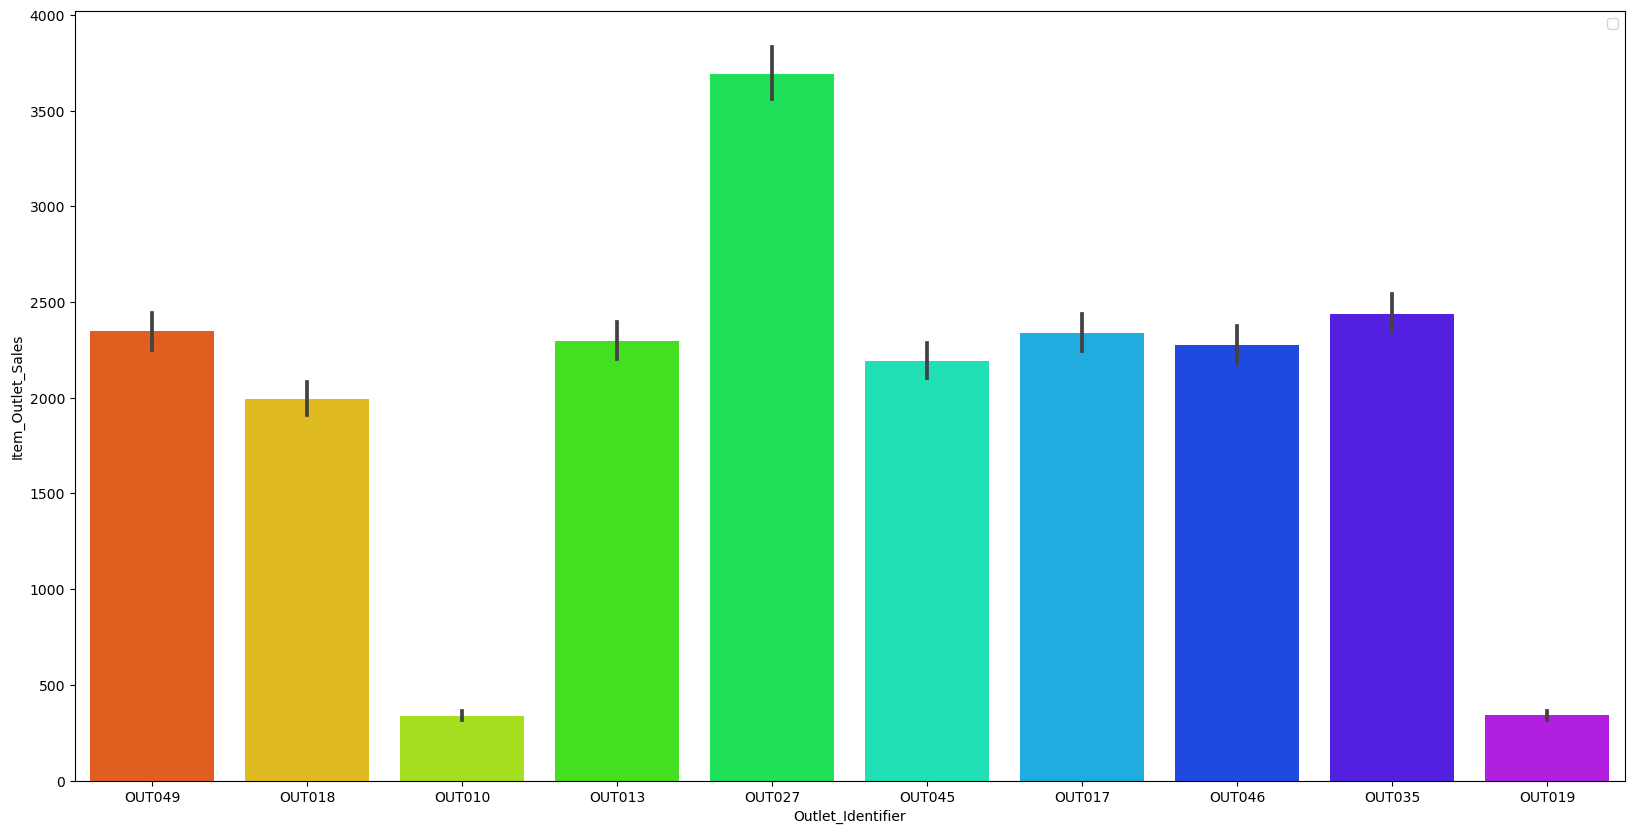

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=df_train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


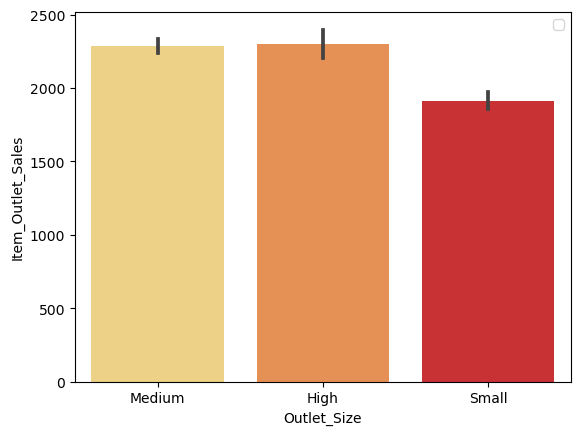

In [84]:

sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=df_train ,palette='YlOrRd')
plt.xlabel('Outlet_Size')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


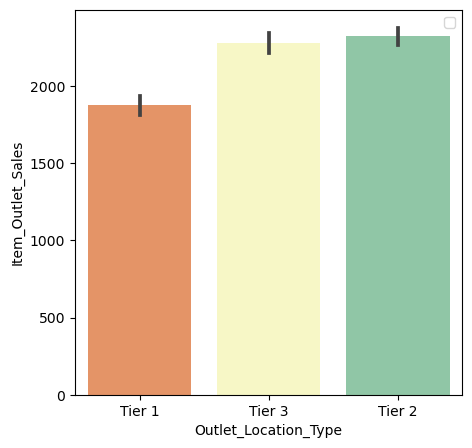

In [85]:
plt.figure(figsize=(5,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=df_train ,palette='Spectral')
plt.xlabel('Outlet_Location_Type')
plt.legend()


# Feature Engineering

In [95]:
#ONEHOtEncoding
column = ['Item_Type','Outlet_Type']

OHE_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OHE_encoder.fit_transform(df_train[column])).astype('int64')
te_oh = pd.DataFrame(OHE_encoder.fit_transform(df_test[column])).astype('int64')
#get feature columns
tr_oh.columns = OHE_encoder.get_feature_names_out(column)
te_oh.columns = OHE_encoder.get_feature_names_out(column)

# One-hot encoding removed index; put it back
tr_oh.index = df_train.index
te_oh.index = df_test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired)
df_train = pd.concat([df_train, tr_oh], axis=1)
df_test = pd.concat([df_test, te_oh], axis=1)



In [96]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#REMOVING CATEGORICAL COLUMN as they are irrelevant columns now

In [98]:
df_train  = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
df_test = df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [99]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,443.4228,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,2097.2700,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,994.7052,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# MODELING
1.Linear Regression 
2.Random Forest Regressor
3.XG Boost Regressor